### Kalman Filter applied in market beta

In [1]:
### Importing librarys
import pandas as pd
import numpy as np
from pykalman import KalmanFilter
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid') #### Plot style

In [2]:
### Importing data from economatica
df = pd.read_excel('C:/Users/Jhona/OneDrive - Grupo Marista/TCC/Dados (Temporário)/retornos_diarios.xlsx', skiprows=3, 
                    parse_dates=True, index_col=0)
ibov = pd.read_excel('C:/Users/Jhona/OneDrive - Grupo Marista/TCC/Dados (Temporário)/retornos_ibov.xlsx', skiprows=3, 
                    parse_dates=True, index_col=0)

##### Manipulating data

In [3]:
df.drop(index=df.index[0], axis=0, inplace=True) ### excluding the first row 
ibov.drop(index=df.index[0], axis=0, inplace=True)

In [4]:
df.replace(to_replace=['-'], value=np.nan, inplace=True) ### replace string
ibov.replace(to_replace=['-'], value=np.nan, inplace=True)

In [5]:
### Function to replace columns name
def columns(df): #renomeando colunas com as ações
    df.columns = df.columns.str[39:]
columns(df)
ibov.rename(columns={'Fechamento\najust p/ prov\nEm moeda orig': 'Ibovespa'}, inplace=True)

In [6]:
df.isnull().sum() ### counting NaN values in Data Frame

ABCB4    154
ALPA4    154
ABEV3    154
AMER3    154
B3SA3    154
        ... 
VULC3    555
WEGE3    154
WHRL4    341
PORT3    263
YDUQ3    154
Length: 135, dtype: int64

In [7]:
df.fillna(method = 'ffill', inplace=True)
ibov.fillna(method='ffill', inplace=True)

In [8]:
### Pct change assets
df_pct = df.pct_change()
df_pct.dropna(inplace=True)
df_pct = df_pct.loc[:'2022-06-30']

### Pct change iboc
ibov_pct = ibov.pct_change()
ibov_pct.dropna(inplace=True)

In [9]:
matrix = pd.concat([df_pct, ibov_pct], axis=1)

In [10]:
matrix.dropna(inplace=True)

### Filtro de Kalman

In [11]:
obs_mat = np.expand_dims(np.vstack([[matrix['Ibovespa']], [np.ones(len(matrix['Ibovespa']))]]).T, axis=1)


In [32]:
kalman = KalmanFilter(initial_state_mean=[0,0],
                        initial_state_covariance=np.ones((2,2)),
                        transition_matrices=np.eye(2),
                        observation_matrices=obs_mat
                        )

In [54]:
state_means = []
for i in matrix.columns:
    state_means.append(kalman.filter(matrix[i].values)[0])


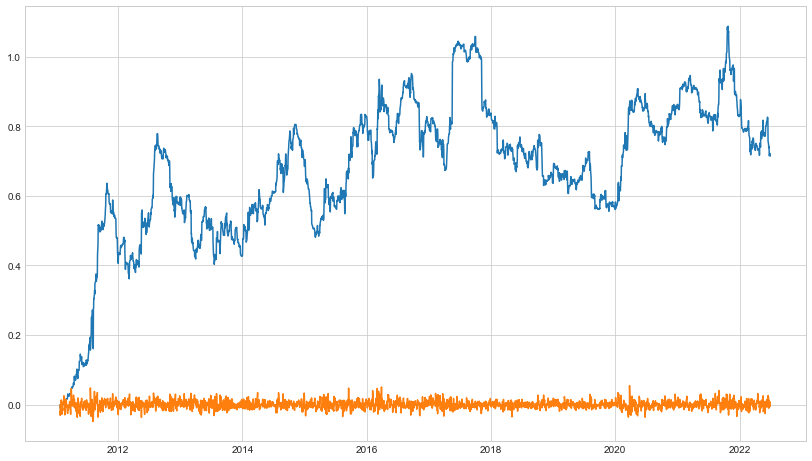

In [66]:
plt.figure(figsize = (14,8))
plt.plot(df_pct.index, state_means[0], label = "Coeficiente")

In [58]:
len(state_means)

136

In [59]:
len(matrix.columns)

136